In [8]:
# Step 1: Install needed packages
!pip install pandas numpy tensorflow faker

# Step 2: Import
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

# Step 3: Load your CSV file
df = pd.read_csv('/content/Customer.csv')  # Replace with your uploaded file

# Step 4: Convert DOB to age
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
today = pd.to_datetime('today')
df['age'] = (today.year - df['date_of_birth'].dt.year).fillna(30).astype(int)

# Step 5: Normalize the age values between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
age_scaled = scaler.fit_transform(df[['age']])

# Step 6: Define the Generator
def build_generator():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(10,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='tanh')  # Output a single value
    ])
    return model

# Step 7: Define the Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # 1 for real, 0 for fake
    ])
    return model

# Step 8: Instantiate the models
generator = build_generator()
discriminator = build_discriminator()

# Step 9: Compile the Discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 10: Build and Compile the GAN
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(10,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


In [10]:
# Rebuild Generator
def build_generator():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(10,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='tanh')
    ])
    return model

# Rebuild Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Re-create the models
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator first
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Freeze discriminator
discriminator.trainable = False

# Build GAN model
gan_input = tf.keras.Input(shape=(10,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)

# Compile GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')


In [11]:
# Step 11: Train the GAN
epochs = 6000
batch_size = 32

for epoch in range(epochs):
    # Real samples
    idx = np.random.randint(0, age_scaled.shape[0], batch_size)
    real_ages = age_scaled[idx]

    # Fake samples
    noise = np.random.normal(0, 1, (batch_size, 10))
    fake_ages = generator.predict(noise, verbose=0)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_ages, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_ages, np.zeros((batch_size, 1)))

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 10))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {(d_loss_real[0] + d_loss_fake[0]):.4f}] [G loss: {g_loss:.4f}]")


0 [D loss: 1.3419] [G loss: 0.6641]
100 [D loss: 1.4698] [G loss: 0.5816]
200 [D loss: 1.4999] [G loss: 0.5581]
300 [D loss: 1.5116] [G loss: 0.5494]
400 [D loss: 1.5171] [G loss: 0.5449]
500 [D loss: 1.5202] [G loss: 0.5421]
600 [D loss: 1.5226] [G loss: 0.5403]
700 [D loss: 1.5243] [G loss: 0.5390]
800 [D loss: 1.5254] [G loss: 0.5380]
900 [D loss: 1.5264] [G loss: 0.5372]
1000 [D loss: 1.5273] [G loss: 0.5366]
1100 [D loss: 1.5279] [G loss: 0.5361]
1200 [D loss: 1.5285] [G loss: 0.5356]
1300 [D loss: 1.5291] [G loss: 0.5353]
1400 [D loss: 1.5295] [G loss: 0.5350]
1500 [D loss: 1.5297] [G loss: 0.5347]
1600 [D loss: 1.5300] [G loss: 0.5345]
1700 [D loss: 1.5303] [G loss: 0.5343]
1800 [D loss: 1.5306] [G loss: 0.5341]
1900 [D loss: 1.5308] [G loss: 0.5339]
2000 [D loss: 1.5311] [G loss: 0.5338]
2100 [D loss: 1.5312] [G loss: 0.5336]
2200 [D loss: 1.5314] [G loss: 0.5335]
2300 [D loss: 1.5316] [G loss: 0.5334]
2400 [D loss: 1.5318] [G loss: 0.5333]
2500 [D loss: 1.5319] [G loss: 0.5332

In [8]:
# # Train the GAN again
# epochs = 1000
# batch_size = 32

# for epoch in range(epochs):
#     # Real samples
#     idx = np.random.randint(0, age_scaled.shape[0], batch_size)
#     real_ages = age_scaled[idx]

#     # Fake samples
#     noise = np.random.normal(0, 1, (batch_size, 10))
#     fake_ages = generator.predict(noise, verbose=0)

#     # Train discriminator
#     d_loss_real = discriminator.train_on_batch(real_ages, np.ones((batch_size, 1)))
#     d_loss_fake = discriminator.train_on_batch(fake_ages, np.zeros((batch_size, 1)))

#     # Train generator
#     noise = np.random.normal(0, 1, (batch_size, 10))
#     g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # # Print every 100 steps
    # if epoch % 100 == 0:
    #     print(f"{epoch} [D loss: {(d_loss_real[0] + d_loss_fake[0]):.4f}] [G loss: {g_loss:.4f}]")


0 [D loss: 1.4265] [G loss: 0.7285]
100 [D loss: 1.4220] [G loss: 0.7038]
200 [D loss: 1.4248] [G loss: 0.7005]
300 [D loss: 1.4261] [G loss: 0.6989]
400 [D loss: 1.4269] [G loss: 0.6980]
500 [D loss: 1.4276] [G loss: 0.6973]
600 [D loss: 1.4280] [G loss: 0.6969]
700 [D loss: 1.4285] [G loss: 0.6965]
800 [D loss: 1.4287] [G loss: 0.6962]
900 [D loss: 1.4290] [G loss: 0.6960]


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assume generator is your trained Keras model from before
num_samples = 1000
noise_dim = 10  # match your generator input

noise = np.random.normal(0, 1, (num_samples, noise_dim))
generated_scaled_ages = generator.predict(noise)

synthetic_ages = scaler.inverse_transform(generated_scaled_ages)
synthetic_ages = synthetic_ages.flatten().astype(int)

print(synthetic_ages[:10])

# Inverse transform to original age scale
# Assuming you used MinMaxScaler fitted on real ages earlier as 'scaler'
synthetic_ages = scaler.inverse_transform(generated_scaled_ages)

# Convert to integer ages
synthetic_ages = synthetic_ages.flatten().astype(int)

print(synthetic_ages[:10])  # Check first 10 synthetic ages


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[25 25 25 25 25 25 25 25 25 25]
[25 25 25 25 25 25 25 25 25 25]


In [16]:
from sklearn.preprocessing import MinMaxScaler

ages = df['age'].values.reshape(-1, 1)  # real ages from your CSV
scaler = MinMaxScaler()
scaler.fit(ages)  # fit scaler only on real data ages


MinMaxScaler()

In [13]:
from faker import Faker
import pandas as pd
import numpy as np

fake = Faker()

# 1. Generate synthetic ages using your trained GAN (assuming generator & scaler are ready)
num_samples = 500
noise_dim = 10  # should match your GAN input

noise = np.random.normal(0, 1, (num_samples, noise_dim))
generated_scaled_ages = generator.predict(noise)
synthetic_ages = scaler.inverse_transform(generated_scaled_ages).flatten().astype(int)

for age in synthetic_ages:
    age_int = int(age)
    first_name = fake.first_name()
    last_name = fake.last_name()
    dob = fake.date_of_birth(tzinfo=None, minimum_age=age_int, maximum_age=age_int).strftime('%Y-%m-%d')
    address = fake.address().replace('\n', ', ')
    phone_number = fake.phone_number()

    synthetic_customers.append({
        "customer_id": fake.uuid4(),
        "first_name": first_name,
        "last_name": last_name,
        "date_of_birth": dob,
        "address": address,
        "phone_number": phone_number
    })


# 3. Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_customers)

# 4. Preview the synthetic data
print(synthetic_df)

# 5. (Optional) Save to CSV
synthetic_df.to_csv("synthetic_customers.csv", index=False)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


NameError: name 'synthetic_customers' is not defined

In [14]:
from faker import Faker
import pandas as pd
import numpy as np

fake = Faker()

# 1. Generate synthetic ages using your trained GAN (assuming generator & scaler are ready)
num_samples = 500
noise_dim = 10  # should match your GAN input

noise = np.random.normal(0, 1, (num_samples, noise_dim))
generated_scaled_ages = generator.predict(noise)
synthetic_ages = scaler.inverse_transform(generated_scaled_ages).flatten().astype(int)

synthetic_customers = []  # Initialize list BEFORE loop

for age in synthetic_ages:
    age_int = int(age)
    first_name = fake.first_name()
    last_name = fake.last_name()
    dob = fake.date_of_birth(tzinfo=None, minimum_age=age_int, maximum_age=age_int).strftime('%Y-%m-%d')
    address = fake.address().replace('\n', ', ')
    phone_number = fake.phone_number()

    synthetic_customers.append({
        "customer_id": fake.uuid4(),
        "first_name": first_name,
        "last_name": last_name,
        "date_of_birth": dob,
        "address": address,
        "phone_number": phone_number
    })

# 3. Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_customers)

# 4. Preview the synthetic data
print(synthetic_df)

# 5. (Optional) Save to CSV
synthetic_df.to_csv("synthetic_customers.csv", index=False)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
                              customer_id first_name last_name date_of_birth  \
0    5f37cde8-75c7-488c-9114-f62fae3e56db     Daniel     Scott    2000-03-23   
1    2fd3966e-d541-4406-82a2-d558a9797285      James     Evans    1999-06-16   
2    8f527e96-4f59-45d2-a9e6-8c67bd0c9950   Jeremiah     Adams    2000-04-21   
3    f327f562-a16d-422d-a31e-cfaaf99d7db5      David     James    1999-11-05   
4    76ae2de3-fca3-4709-ac64-d18b2781035c      Jaime  Andersen    2000-02-18   
..                                    ...        ...       ...           ...   
495  59e7a136-99b4-48ad-bb22-b324428e4e32     Monica    Conley    2000-02-09   
496  c66a91be-2efe-4dfb-94da-e56d3a1cc92b    Antonio    Nguyen    1999-09-01   
497  2243bd66-bddd-4eb0-91e3-ced593807ef7     Austin    Jordan    1999-11-06   
498  359e029c-fdb6-448c-be0e-10500e3f494a    Matthew      Bass    2000-05-01   
499  54671fb0-d2f7-482c-bcf7-5d695e0845e9   Jennifer  Hamilton    1999-09-12   


In [19]:
from faker import Faker
import pandas as pd
import numpy as np

# Initialize Faker
fake = Faker('en_US')


# Number of synthetic records to generate
num_samples = 50

# 1. Generate synthetic ages using your trained GAN
noise_dim = 10  # or whatever your generator expects
noise = np.random.normal(0, 1, (num_samples, noise_dim))

# Assuming you already have a trained generator and a fitted scaler
generated_scaled_ages = generator.predict(noise)
synthetic_ages = scaler.inverse_transform(generated_scaled_ages).flatten()
synthetic_ages = np.clip(synthetic_ages, 1, 100).astype(int)  # keep realistic ages

# 2. Clear list before generation
synthetic_customers = []

# 3. Create fake data rows
for age in synthetic_ages:
    age_int = int(age)
    first_name = fake.first_name()
    last_name = fake.last_name()
    dob = fake.date_of_birth(minimum_age=age_int, maximum_age=age_int).strftime('%Y-%m-%d')
    address = fake.address().replace('\n', ', ')
    phone_number = fake.numerify(text="(%###) ###-####")

    synthetic_customers.append({
        "customer_id": fake.uuid4(),
        "first_name": first_name,
        "last_name": last_name,
        "date_of_birth": dob,
        "address": address,
        "phone_number": phone_number
    })


# 4. Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_customers)

# 5. Show preview
print(synthetic_df.head())
print(f"Total rows generated: {len(synthetic_df)}")

# 6. Save to CSV (optional)
synthetic_df.to_csv("synthetic_customers.csv", index=False)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
                            customer_id first_name   last_name date_of_birth  \
0  a6274804-21d4-4ec0-910d-b19ed78e3f4e    Derrick      Nelson    1999-08-21   
1  6b8dd26c-eb8e-4b02-a994-b508bf7ff4b8      Paula       Lynch    1999-11-14   
2  59f6266b-7eda-48ac-b962-40b439d721cf     Angela        York    1999-07-09   
3  781ab43c-4aa3-4c24-a8e7-7b163ac4b36b      Holly      Gibson    2000-01-20   
4  b850708c-d9b5-4b68-b460-08e0ca89c874       Adam  Washington    2000-03-11   

                                             address     phone_number  
0  251 Jimenez Vista Suite 106, Port Edward, OK 6...  (3087) 712-2828  
1  89947 Gibbs Radial Suite 520, Churchhaven, FL ...  (6233) 705-7275  
2  433 Suarez Fields Suite 467, West Melanie, NH ...  (8019) 998-7854  
3             22446 Brown Walks, Coreyport, SC 14186  (3801) 791-6010  
4  15396 Martin Branch Apt. 963, Meganland, IL 55094  (1571) 067-3363  
Total rows generated: 50


In [20]:
synthetic_df.to_csv("synthetic_customers.csv", index=False)


General GANS only deal with numbers so other than the dob nothing can be generated by GANS so used faker.

To generate synthetic data for all installing another Gan type

In [21]:
pip install ctgan


In [25]:
import pandas as pd
from ctgan import CTGAN  # updated import

# Load your real dataset
real_data = pd.read_csv("Customer.csv")

# Drop unique ID for training
real_data = real_data.drop(columns=["customer_id"])

# Define categorical columns
categorical_columns = ["first_name", "last_name", "date_of_birth", "address", "phone_number"]

# Initialize CTGAN model
ctgan = CTGAN(epochs=300)  # train for 300 epochs

# Train the model
ctgan.fit(real_data, discrete_columns=categorical_columns)

# Generate synthetic data samples
synthetic_data = ctgan.sample(500)

# Add synthetic UUIDs for customer_id
import uuid
synthetic_data["customer_id"] = [str(uuid.uuid4()) for _ in range(len(synthetic_data))]

# Reorder columns
cols = ["customer_id"] + [col for col in synthetic_data.columns if col != "customer_id"]
synthetic_data = synthetic_data[cols]

print(synthetic_data.head())

synthetic_data.to_csv("synthetic_CTGan_customers.csv", index=False)


                            customer_id first_name last_name date_of_birth  \
0  ca727d61-22be-463c-bec3-d22655a07555      Fiona     Young    1975-08-25   
1  19a6de8b-102a-44cb-bec7-7d617a4715c2      Alice      Hill    1990-07-10   
2  4da2735f-ded9-4f1d-8ea6-b4517f049e1b    Charlie     Young    1995-01-21   
3  26164155-0e8c-4d94-98b0-75be7bf8d240    Charlie    Turner    1986-09-09   
4  586cdd3d-264e-4ae8-bdf2-945bd35945d2      Julia    Morgan    1986-09-09   

                address  phone_number  
0   12 Elm St, New York    9988776655  
1  62 Aspen Ct, Atlanta    7654321098  
2  34 Spruce Dr, Austin    5432109876  
3  77 Palm Ave, Orlando    9988776655  
4  62 Aspen Ct, Atlanta    7654321098  


In [26]:
print(f"Total rows generated: {len(synthetic_data)}")


Total rows generated: 500


=== Kolmogorov-Smirnov Test ===
first_name: KS Statistic=0.0240, p-value=1.0000
last_name: KS Statistic=0.0540, p-value=1.0000
date_of_birth: KS Statistic=0.0440, p-value=1.0000
address: KS Statistic=0.0400, p-value=1.0000
phone_number: KS Statistic=0.0240, p-value=1.0000


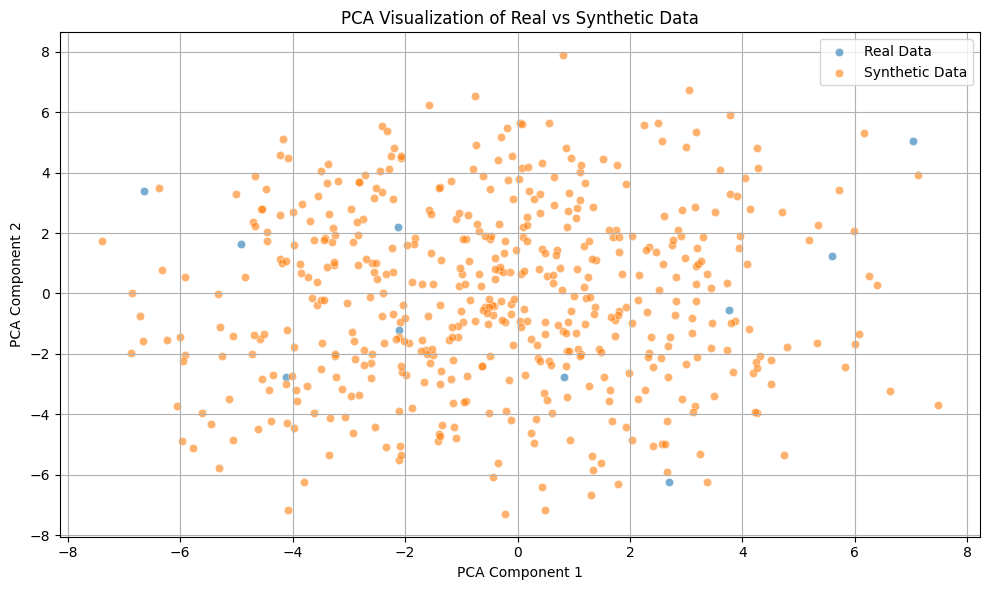

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Load real and synthetic data
real_data = pd.read_csv("Customer.csv")
synthetic_data = pd.read_csv("synthetic_CTGan_customers.csv")  # Replace with your CTGAN output CSV path

# Drop ID and non-numeric fields for comparison
columns_to_use = ["first_name", "last_name", "date_of_birth", "address", "phone_number"]

# Combine both for encoding
combined = pd.concat([real_data[columns_to_use], synthetic_data[columns_to_use]])

# Encode categorical features
encoders = {}
for col in combined.columns:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col])
    encoders[col] = le

# Split back
real_encoded = combined.iloc[:len(real_data)]
synthetic_encoded = combined.iloc[len(real_data):]

# --- 1. Kolmogorov-Smirnov (KS) Test ---
print("=== Kolmogorov-Smirnov Test ===")
for col in columns_to_use:
    stat, p_value = ks_2samp(real_encoded[col], synthetic_encoded[col])
    print(f"{col}: KS Statistic={stat:.4f}, p-value={p_value:.4f}")

# --- 2. PCA Visualization ---
pca = PCA(n_components=2)
real_pca = pca.fit_transform(real_encoded)
synthetic_pca = pca.transform(synthetic_encoded)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=real_pca[:, 0], y=real_pca[:, 1], label='Real Data', alpha=0.6)
sns.scatterplot(x=synthetic_pca[:, 0], y=synthetic_pca[:, 1], label='Synthetic Data', alpha=0.6)
plt.title('PCA Visualization of Real vs Synthetic Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
